In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import copy

In [4]:
def v_opt(l_chain):
    P = np.zeros((l_chain*3,l_chain*3))
    r= np.zeros(l_chain*3)
    r[l_chain*2-1] = 10
    r[l_chain*3-1] = -10
    for i in range(l_chain-1):
        P[i,i+1] = 1
    P[l_chain-1,l_chain] = P[l_chain-1,l_chain*2] = 0.5
    for i in range(l_chain-1):
        P[l_chain+i,l_chain+i+1]= 1
        P[l_chain*2+i,l_chain*2+i+1]= 1
    P[l_chain*2-1,0] = 1
    P[l_chain*3-1,0] = 1
    return P,r

In [7]:
def run(P,r,v_s,beta,gamma=0.9999,iteration = 5000,decay=False,lr=0.1,exp_smooth=0): 
    dist = []
    v = np.ones((P.shape[0]))
    #v=copy.deepcopy(v_s)
    e = np.zeros((P.shape[0]))
    s = 0
    v_t = v[s]
    e[s] = 1
    dist_mean = []
    dist= []
    for n in range(iteration):
        s_ = np.random.choice(np.arange(size),p=P[s,:])
        #lr /= 1+0.00001*n
        e = (1-beta[s])*e
        e[s] += beta[s]
        v_t_n = (1-beta[s_]) * (v_t -r[s]) + beta[s_] *v[s_]
        delta = r[s] + gamma *(v_t_n) - v_t
        #print("s: ",s," s_: ",s_," r: ",r[s]," delta ",delta," v_t_n ",v_t_n," v_t ",v_t)
        #print(v)
        #print(e)
        #print("")
        #print(v_t," ",v_s[s])
        #print("")
        #print(v)
        for i in range(P.shape[0]):
            v[i] += lr*e[i]*delta

        dist.append(np.abs(v_s[s]-v_t))
        if s ==0:
            dist_mean.append(np.array(dist).mean())
            dist = []
        v_t = (1-beta[s_]) * ((v_t -r[s])/gamma)+ beta[s_] *v[s_]
        s = s_
    return np.array(dist_mean)

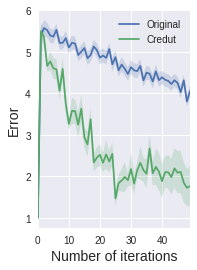

In [11]:
l=8   ## Length of the walks without information 
size = l*3  ## Length of the total MDP
length_score = 50 ## Number of episodes considered
gamma = 0.9999
iteration = length_score * l * 2
rep=10

### Get the transition reward and opt v_s
P,r = v_opt(l)
v_s = np.linalg.solve((np.identity(size)-gamma*P),r)

## Optimal beta
beta_opt = np.zeros(l*3)
beta_opt[0] = beta_opt[l] = beta_opt[l*2] = 1


result = np.empty((rep,length_score,2))
for i in range(rep):
    result[i,:,0] = run(P,r,v_s,[1]*size*3,iteration=iteration)[:length_score]
    result[i,:,1] = run(P,r,v_s,beta_opt,iteration=iteration)[:length_score]


ax = plt.subplot(121)
ax.set_xlabel("Number of iterations",fontsize=14)
ax.set_ylabel("Error",fontsize=14)
sns.tsplot(result[:,:,:],condition=["Original","Credut"])
